In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.read_csv('diabetes.csv')
dados = pd.read_csv('diabetes.csv')

In [3]:
dados.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dados.shape

(768, 9)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### PyCaret classificação

Estão comentadas para que o modelo ganhe performance

Para sua utilização é necessário a instalação da biblioteca, de preferência no Python 3.8

In [6]:
#from pycaret.classification import *

In [7]:
#exp_name = setup(data = dados,  target = 'Outcome')


In [8]:
#best_model = compare_models()

# Divisão em Treino e Teste

In [9]:
X = dados.drop('Outcome', axis = 1)
y = dados.Outcome

from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = SEED)

### Métricas

Sobre as métricas:

    -Acurácia: Mede o quanto o modelo acertou ou seja os verdadeiros positivos e verdadeiros negativos
    
    -Precisão: Calcula quantos verdadeiros positivos foram preditos de forma correta
    
    -Recall: Conhecido como sensibilidade, mede quão bom o modelo está em medir o resultado realmente positivo
    
    -F1 Score: Identificar se algum dos valores de recall ou precisão estão baixos
    
    -Curva ROC e AUC: Quanto maior o número mais bem avaliado será o modelo de classificação
    

### AUC Score

Quantifica a Curva ROC através da área sob esta curva

Convenção Estatística:

    -área < 0,7: baixa discriminiação
    -0,7 ≤ área < 0,8: discriminação aceitável
    -0,8 ≤ área < 0,9: discriminação excelente
    -área > 0,9: discriminação excepcional

In [10]:
#importando as métricas
from sklearn import metrics


In [11]:
#importando a matriz de confusão
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [12]:
#importando a Curva ROC e AOC
from sklearn.metrics import roc_curve, roc_auc_score


### Função para implementar os modelos

In [13]:
def mostrar_resultados(modelo):
    model = modelo()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
    print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
    print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred)))
    print('--'*60)

    cm = plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format = '.3g')
    plt.show()
    
    prob_previsao = model.predict_proba(X_test)[:,1] #probabilidade do evento ser predito como 0 ou 1 - uma matriz com 2 colunas

    #tfp = taxa falsos positivos
    #tvp = taxa verdadeiros positivos

    tfp, tvp, limite = roc_curve(y_test, prob_previsao)
    print('roc_auc: {:.3}'.format(roc_auc_score(y_test, prob_previsao)))

    plt.subplots(1, figsize=(5,5))
    plt.title('Curva ROC')
    plt.plot(tfp,tvp)
    plt.xlabel('Especifidade')
    plt.ylabel('Sensibilidade')
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
    plt.show()

### Modelo 01: Gradient Boosting Classifier

Acurácia: 0.749
Precisão: 0.631
Recall: 0.662
F1: 0.646
------------------------------------------------------------------------------------------------------------------------


C:\Users\DellWyse\anaconda3\envs\DigitalHouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


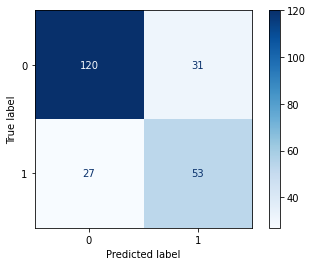

roc_auc: 0.794


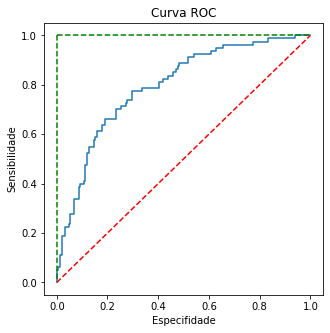

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

mostrar_resultados(GradientBoostingClassifier)

### Modelo 02: Logistic Regression

C:\Users\DellWyse\anaconda3\envs\DigitalHouse\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DellWyse\anaconda3\envs\DigitalHouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Acurácia: 0.74
Precisão: 0.625
Recall: 0.625
F1: 0.625
------------------------------------------------------------------------------------------------------------------------


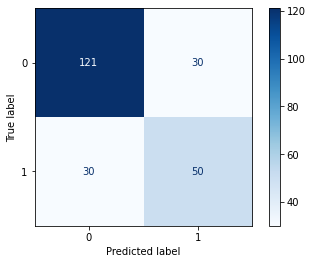

roc_auc: 0.8


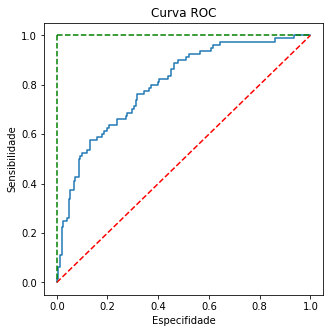

In [15]:
from sklearn.linear_model import LogisticRegression

mostrar_resultados(LogisticRegression)

### Modelo 03: 	Random Forest Classifier

Acurácia: 0.758
Precisão: 0.643
Recall: 0.675
F1: 0.659
------------------------------------------------------------------------------------------------------------------------


C:\Users\DellWyse\anaconda3\envs\DigitalHouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


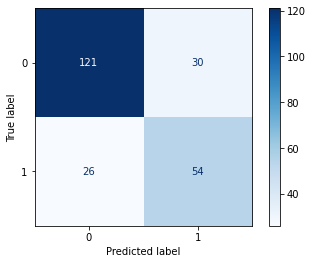

roc_auc: 0.804


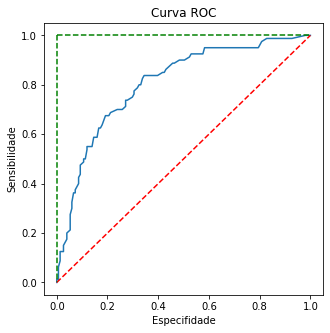

In [16]:
from sklearn.ensemble import RandomForestClassifier

mostrar_resultados(RandomForestClassifier)

### Modelo 04: Decision Tree Classifier

Acurácia: 0.693
Precisão: 0.545
Recall: 0.675
F1: 0.603
------------------------------------------------------------------------------------------------------------------------


C:\Users\DellWyse\anaconda3\envs\DigitalHouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


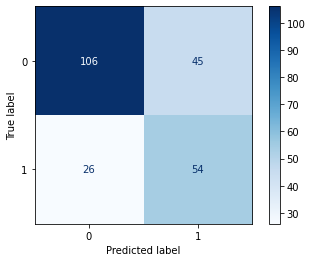

roc_auc: 0.688


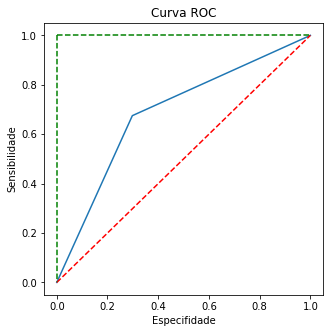

In [17]:
from sklearn.tree import DecisionTreeClassifier
mostrar_resultados(DecisionTreeClassifier)